# Advanced fMRI data analysis 
## Functional connectivity


In this assignment, your task is to run simple seed-to-voxel functional connectivity analysis of fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 19-06-2020

-------------------

## Task 1



Repeat seed-to-voxel analysis from our last excercise with your favourite brain region as a *seed*!

### Fill some details about the selected seed region:

Name of the selected brain area: left Lateral Occipital tacto-visual (LOtv)

MNI coordinates of selected brain area: x=-47, y=-62, z=-10

Source (website, journal article, etc.): https://watermark.silverchair.com/1201202.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAApwwggKYBgkqhkiG9w0BBwagggKJMIIChQIBADCCAn4GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMEsJrYxHALbtVsn0kAgEQgIICTw5IpqMgVJIBeLDd4ylwfZKhqK-GuriL9o37bePCPTmjPSnsMlPaR3de-I2xa-AN1RraiqXDTrtF5Nu-2wMpVROMNzya-_Ay9-MXdeSOyZfz_U270ACHX6ezSqjktWFNc7BqCfeICh5ofZkV_vsbupHHrA_DWlnjkPk3raJ-axMzq2P5IbLG1k8LGHVKMjzI2sX2YKTfrR7Qj8C18cpeCjhCDIv57lGcjWkxFuPprcuKegcTPC30tDsq1k2JOq1ExOfU2MBY3XLuhdjBLxhImkPTICaiSAm1yt4oaBCoDR_PJrF4wnjbT1p5f0YJK2sw-u1P96jGzb2zLTAr_Oc2RIVOfCQ7EovzFku0aQCWGJWtCMW20Ei1W52a9kVs0NLozU3ZS0CwVTUgSvgFKH5C__ZSiKVUESn-aZhqU7xGH-IG8evjjmjulOUlJJ6rBu_WrU4NV6p_l5B0Zz1qG_h7TiQNrCkSaHL8Q5k2kne3N-a1hFF7aQU8w6jWKR9k2c6ydRNZCBIHGVFp7ni8jkzd9LiCskFiXch6_tYoyuCa2kKw8-g_c_7dwIE3MqeaU9ex-FKb-acXysdcDzz7fiRj0h3MeV8zjGDO19IoABmsMx5-apVwGUwSz0v2E1HCJf3syL3R5LzJGI8xuTbd5Mat1TMTfK5YdOas-Iy48tIAMgX7nV_vqauuXMy4lWMRRmbQAFLC6axlqHCK4KD_K8kUd36HP93In3Tw9voY5jfQFJ4eMxSwx_F22cIZ7cr1IUDh3lbUzrt8xK7K_0GJvMMP2g

In [1]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

In [2]:
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

In [3]:
lotv_coords = [(-47, -62, -10)]
seed_masker = input_data.NiftiSpheresMasker(
    lotv_coords, radius=8,
    detrend=True, standardize=True)

In [4]:
seed_timeseries = seed_masker.fit_transform(func_filename,
                                             confounds=confounds_filename)
seed_timeseries = np.squeeze(seed_timeseries)

In [5]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_timeseries = brain_masker.fit_transform(func_filename,
                                               confounds=confounds_filename)

In [6]:
# Print shape of seed time-series

print(seed_timeseries.shape)

# Print shape of brain time-series

print(brain_timeseries.shape)

(168,)
(168, 32504)


In [7]:
# Calculate Pearson product-moment correlation coefficient between seed and all voxel trime-series
from scipy import stats

corr_map = np.zeros(brain_timeseries.shape[1])

for i in range(brain_timeseries.shape[1]):
    corr_map[i] = stats.pearsonr(seed_timeseries, brain_timeseries[:,i])[0]

		Threshold: 0.2


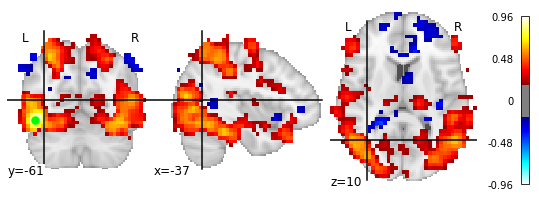

		Threshold: 0.3


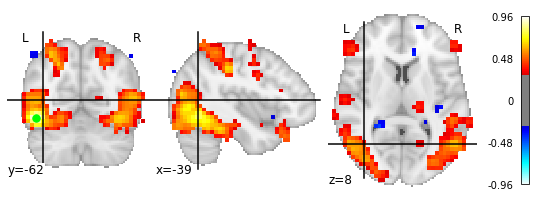

		Threshold: 0.4


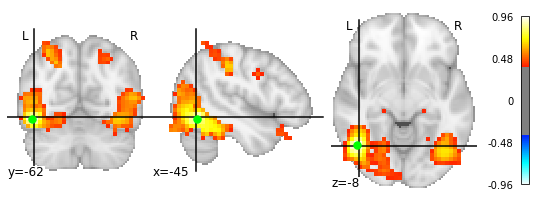

		Threshold: 0.5


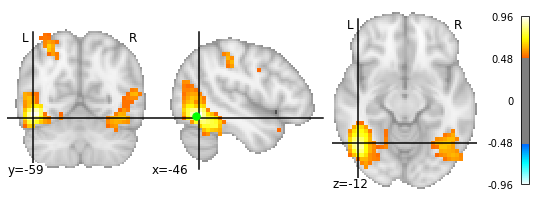

		Threshold: 0.6


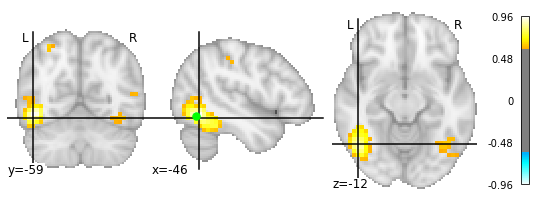

		Threshold: 0.7


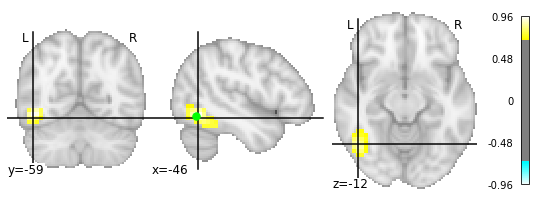

		Threshold: 0.8


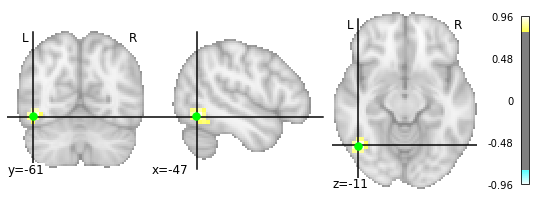

		Threshold: 0.9


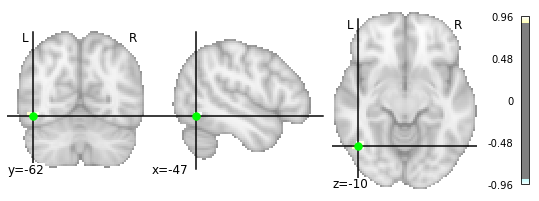

In [23]:
import matplotlib.pyplot as plt

seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)

# Plot correlation map using plot_stat_map

for threshold in np.linspace(.2, .9, 8):
    
    print("\t\tThreshold: %.1f"%threshold)
    display = plotting.plot_stat_map(seed_to_voxel_correlations_img, threshold=threshold)
    display.add_markers(marker_coords=lotv_coords, marker_color='lime', marker_size=55, )
    plt.show()

What brain areas are functionally connected with your seed region?

**Answer**: 

Weak positive correlation (0.2<=r<=0.5): Posterior Parietal, Postcentral Gyrus, some medial and ventral (pre)frontal regions

Weak negative correlation (-.4<=r=<-.2): Intraparietal Sulcus, small regions on the medial side of occipital (precuneus?) and frontal lobes

Moderate positive correlation (0.4<=r<=0.5): Occipito-temporal visual cortex (ventral visual stream), Posterior Parietal (especially around the ipsilateral (lef) post-central sulcus), small patches in the medial and ventral frontal lobe

Strong positive correlation (.6<=r): almost exclusively LOtv's neighborhood + a small region in the analogous area of the right hemisphere